In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

# Read the dataset

In [5]:
df = pd.read_csv('/content/drive/MyDrive/data/Amazon Reviews/Review1.csv')

In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/data/Amazon Reviews/Review.csv')

In [7]:
import string
import inspect
import seaborn as sns

Define a function to map ratings to binary values


In [8]:
def rating(num):
    if(num == 1):
        return 0
    else:
        return 1

In [9]:
colnames = ['Rating', 'Title', 'Description']
df = pd.read_csv('/content/drive/MyDrive/data/Amazon Reviews/Review1.csv', names=colnames)
df = df.sample(10000, random_state = 42)
df['Reviews'] = df['Title'] + ' . ' + df['Description']
df = df.drop(['Title','Description'], axis=1)
df['Rating'] = df['Rating'].apply(rating)

In [10]:
df.shape

(10000, 2)

In [11]:
df.head()

,Rating,Reviews
2079998,0,Expensive Junk . This product consists of a pi...
1443106,0,"Toast too dark . Even on the lowest setting, t..."
3463669,1,Excellent imagery...dumbed down story . I enjo...
2914699,0,Are we pretending everyone is married? . The a...
1603231,0,Not worth your time . Might as well just use a...


In [12]:
# remove 'No Negative' or 'No Positive' from text
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [13]:
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
def clean_text(text):
    # lower text
    text = text.lower()
    # remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    stop = [w for w in stop if w not in ['not', 'no']]
    text = [x for x in text if (x not in stop)]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(t) for t in text]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df['review_clean'] = df['Reviews'].apply(lambda x: clean_text(x))
df.head()

,Rating,Reviews,review_clean
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married author pretend par...
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...


In [15]:
df['Reviews'][2079998]

'Expensive Junk . This product consists of a piece of thin flexible insulating material, adhesive backed velcro and white electrical tape.Problems:1. Instructions are three pictures with little more information.2. Velcro was all crumpled as received and was stronger than the adhesive. When i tried to disengage the velcro both pieces came off and the paint from the ceiling.3. White electrical tape was horrible... cheap, narrow and it fell off in less than 1 hour.4. The price is a ripoff.I am building my own which is easier to use, cheaper, more attractive, and higher r-value. I am surprised Amazon even lists this junk.'

In [16]:
df['review_clean'][2079998]

'expensive junk product consists piece thin flexible insulating material adhesive backed velcro white electrical instruction three picture little velcro crumpled received stronger adhesive tried disengage velcro piece came paint white electrical tape horrible cheap narrow fell le price ripoff.i building easier use cheaper attractive higher r-value surprised amazon even list junk'

# VADER MODEL

In [17]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [18]:
# Initialize the SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis using VADER on the cleaned reviews
df["sentiments"] = df["Reviews"].apply(lambda x: sid.polarity_scores(x))

# Concatenate 'Sentiment' column into separate columns
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)
df.head()

,Rating,Reviews,review_clean,neg,neu,pos,compound
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...,0.000,0.854,0.146,0.9041
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...,0.170,0.769,0.061,-0.5859
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...,0.058,0.613,0.330,0.9686
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married author pretend par...,0.112,0.761,0.127,0.0377
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...,0.175,0.743,0.082,-0.3326


In [19]:
# add number of characters column
df["nb_chars"] = df["Reviews"].apply(lambda x: len(x))

In [20]:
# add number of words column
df["nb_words"] = df["Reviews"].apply(lambda x: len(x.split(" ")))

In [21]:
df.head()

,Rating,Reviews,review_clean,neg,neu,pos,compound,nb_chars,nb_words
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...,0.000,0.854,0.146,0.9041,624,102
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...,0.170,0.769,0.061,-0.5859,208,40
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...,0.058,0.613,0.330,0.9686,411,71
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married author pretend par...,0.112,0.761,0.127,0.0377,383,66
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...,0.175,0.743,0.082,-0.3326,125,26


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [23]:
# add tf-idfs columns
tfidf = TfidfVectorizer(min_df=10)
tfidf_result = tfidf.fit_transform(df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns=tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

In [24]:
df.head()

,Rating,Reviews,review_clean,neg,neu,pos,compound,nb_chars,nb_words,word_aa,...,word_young,word_younger,word_your,word_youtube,word_yr,word_zero,word_zipper,word_zombie,word_zone,word_zoom
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...,0.000,0.854,0.146,0.9041,624,102,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...,0.170,0.769,0.061,-0.5859,208,40,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...,0.058,0.613,0.330,0.9686,411,71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married author pretend par...,0.112,0.761,0.127,0.0377,383,66,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...,0.175,0.743,0.082,-0.3326,125,26,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Word Embeeding

In [25]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [26]:
#create doc2vec vector columns
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)


In [28]:
# transform each document into a vector data
doc2vec_df = df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [29]:
df.head()

,Rating,Reviews,review_clean,neg,neu,pos,compound,nb_chars,nb_words,word_aa,...,word_zero,word_zipper,word_zombie,word_zone,word_zoom,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...,0.000,0.854,0.146,0.9041,624,102,0.0,...,0.0,0.0,0.0,0.0,0.0,0.251710,-0.081475,0.340616,-1.102738,-1.267186
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...,0.170,0.769,0.061,-0.5859,208,40,0.0,...,0.0,0.0,0.0,0.0,0.0,0.204601,0.165500,0.183293,-0.317983,-0.356569
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...,0.058,0.613,0.330,0.9686,411,71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.393100,0.789123,0.184561,-0.334836,-0.055941
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married author pretend par...,0.112,0.761,0.127,0.0377,383,66,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.089861,0.530911,0.346341,-0.064083,-0.136591
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...,0.175,0.743,0.082,-0.3326,125,26,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.101246,-0.075433,0.262006,0.127155,-0.154586


In [27]:
df.shape

(10000, 4178)

In [30]:
# show is_bad_review distribution
df["Rating"].value_counts(normalize = True)

1    0.5046
0    0.4954
Name: Rating, dtype: float64

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

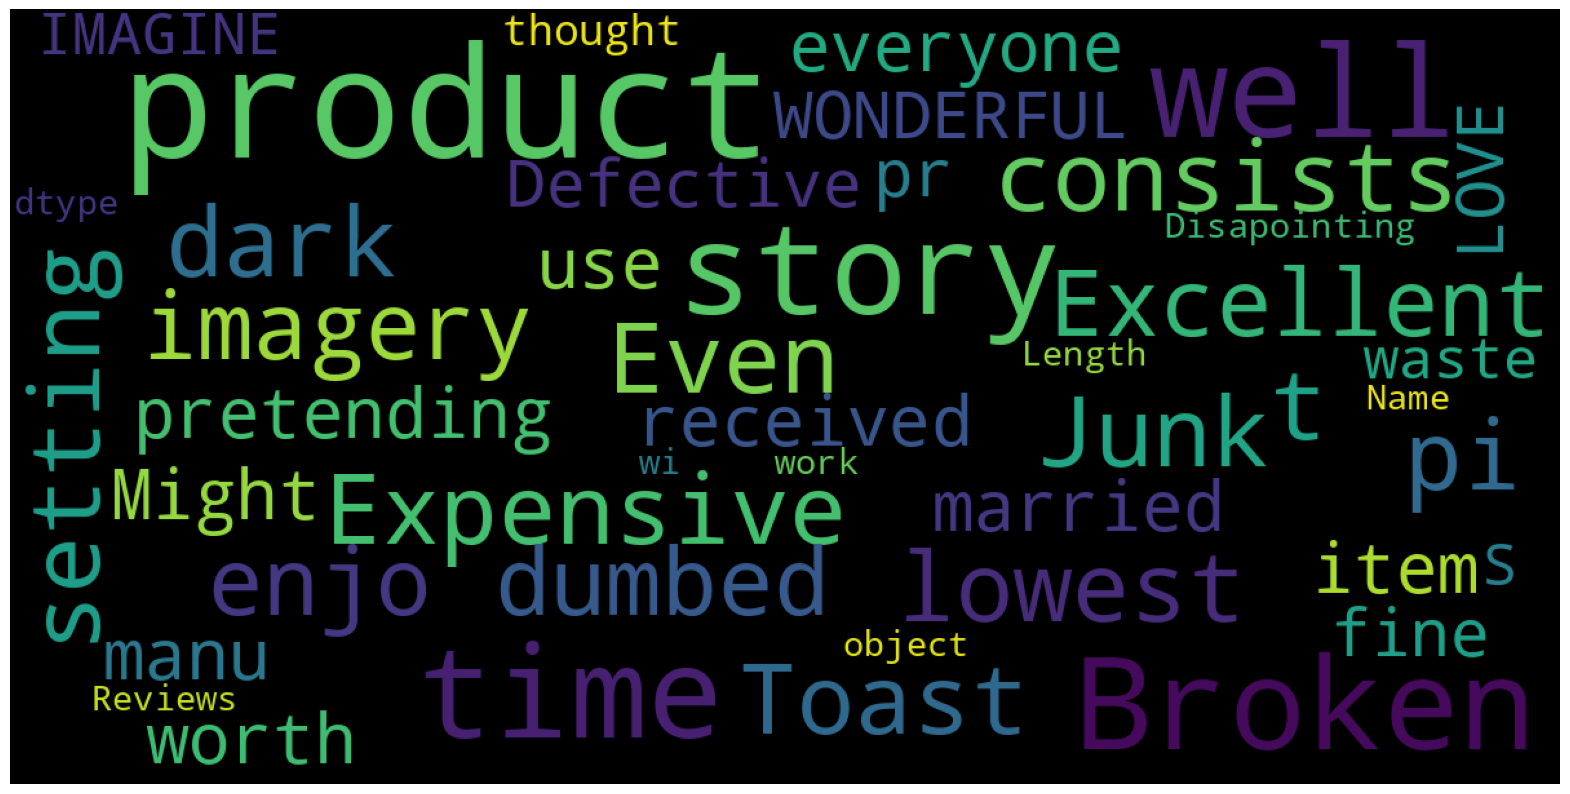

In [32]:
# wordcloud function
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 100,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["Reviews"])

In [33]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Reviews", "pos"]].head(10)

,Reviews,pos
600142,Thanks and God Bless . Thanks and God Bless fo...,0.694
3574869,"Fun, nice challeges. . Fun game, better graphi...",0.650
3533096,"Great, but . . . . The switch fit perfectly an...",0.649
2859986,A must have! . Wonderful facts and great drawi...,0.647
2068335,"awesome! . I love, love, love this movie! I hi...",0.638
1919426,Awesome! . She sings like an angel! Truly bles...,0.632
2984178,Great gift .. . I sent this to a friend in Tex...,0.624
1338725,great self help . Good book to help save lawye...,0.611
1502026,good gift . soft on the inside and fits very w...,0.598
3070896,is great . i wait a few days but i recived in ...,0.586


In [34]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Reviews", "neg"]].head(10)

,Reviews,neg
45442,Not good . Did not like the book really boring...,0.489
752170,worst book ever . contains almost no illustrat...,0.486
1385429,"Hmmm, let's see now... . ...Vomit-inducing, un...",0.485
1670129,Bad Choice . Unfortunately it was the worst pr...,0.460
971267,Bad product . Sold me a bad product and it was...,0.443
112539,waste of money . Half of the time your A STUPI...,0.440
1369466,Engine failed . The waterject failed to operat...,0.435
2391738,"Terrible, terrible, terrible . I had the same ...",0.426
489406,Outrage with Banderas . This movie is horrible...,0.424
2434994,Very Bad Movie!! . This was a very very bad mo...,0.407


<ipython-input-35-e05d14c693a7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
<ipython-input-35-e05d14c693a7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)


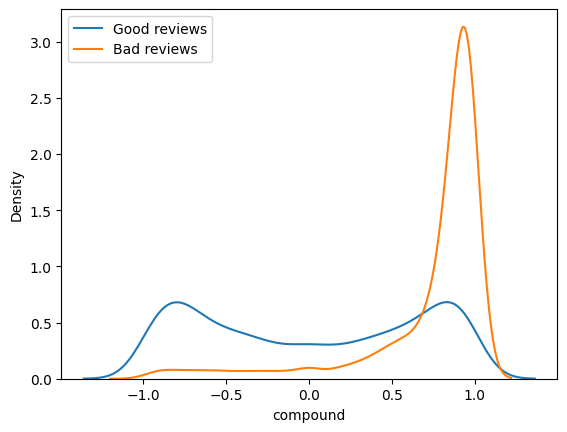

In [35]:
for x in [0, 1]:
    subset = df[df['Rating'] == x]

    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)
plt.legend()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# feature selection
label = "Rating"
ignore_cols = [label, "Reviews", "review_clean"]
features = [c for c in df.columns if c not in ignore_cols]

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size = 0.20, random_state = 42)

# MODEL TRAINING

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve, accuracy_score

# LogisticRegression

In [40]:
lr1 = LogisticRegression(max_iter=5000)

# Define the preprocessing steps for numeric features
lr1.fit(X_train, y_train)

# Evaluate the model on the testing data
lr1_preds = lr1.predict(X_test)

# Evaluate the accuracy of the model
lr1_accuracy = accuracy_score(y_test, lr1_preds)*100
print(f"Accuracy of Linear Regression Model: {lr1_accuracy:.2f}%")

Accuracy of Linear Regression Model: 86.60%


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have trained and made predictions using the lr1 LogisticRegression model
lr1 = LogisticRegression(max_iter=5000)
lr1.fit(X_train, y_train)
lr1_preds = lr1.predict(X_test)
lr1_preds_prob = lr1.predict_proba(X_test)

# Calculate precision, recall, F1 score, and AUC-ROC
lr1_precision = precision_score(y_test, lr1_preds)*100
lr1_recall = recall_score(y_test, lr1_preds)*100
lr1_f1 = f1_score(y_test, lr1_preds)*100
lr1_roc_auc = roc_auc_score(y_test, lr1_preds_prob[:, 1])*100

# Print the evaluation metrics
print(f"Precision: {lr1_precision:.2f}")
print(f"Recall: {lr1_recall:.2f}")
print(f"F1 score: {lr1_f1:.2f}")
print(f"AUC-ROC: {lr1_roc_auc:.2f}")


Precision: 86.06
Recall: 87.92
F1 score: 86.98
AUC-ROC: 93.33


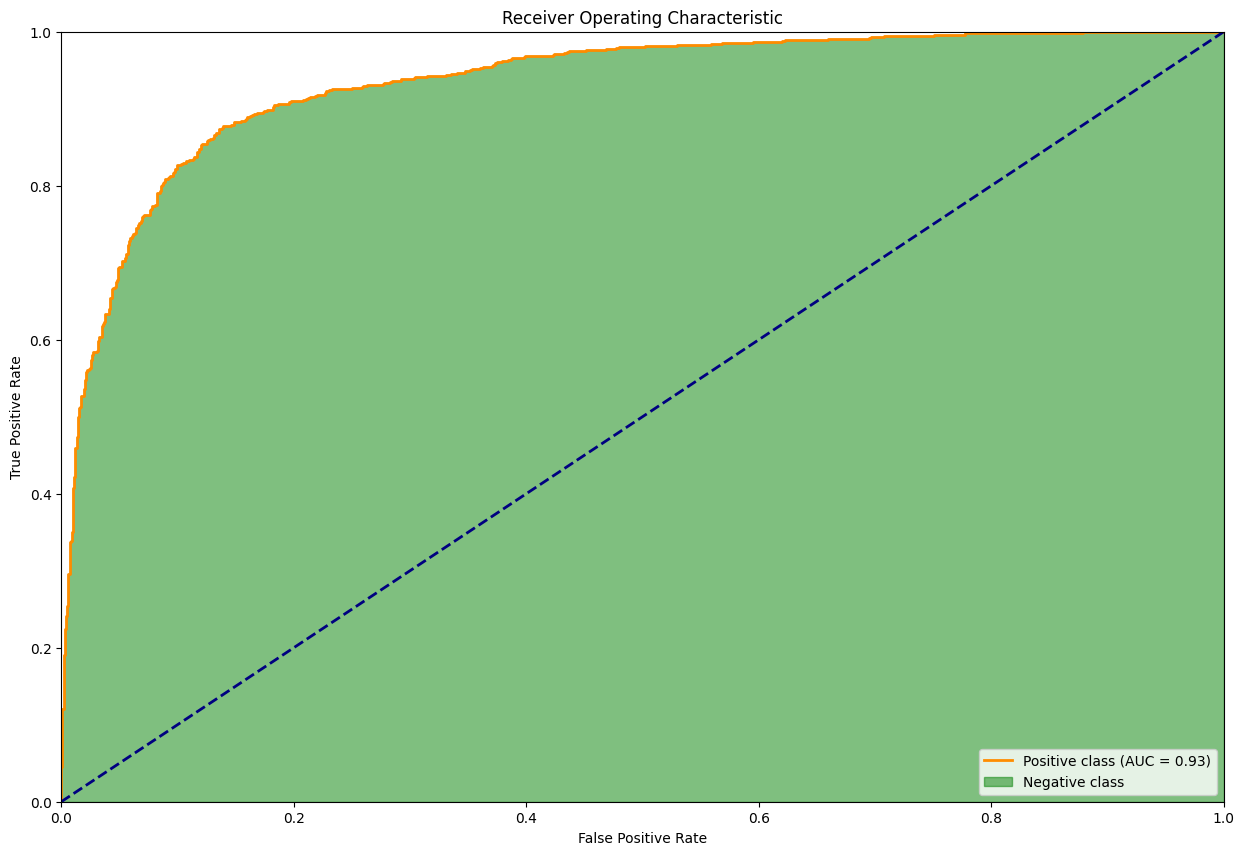

In [42]:
# Get the predicted probabilities for the positive class
lr1_preds_prob = lr1.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_preds_prob, pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Positive class (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.fill_between(fpr, tpr, color='green', alpha=0.5, label='Negative class')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

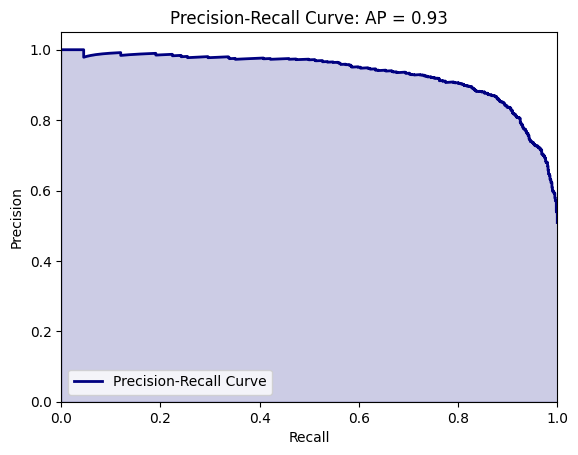

In [43]:
# Fit the Logistic Regression model to the training data
lr1.fit(X_train, y_train)

# Predict the probabilities for the positive class
lr1_probs = lr1.predict_proba(X_test)[:, 1]

# Calculate the precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, lr1_probs)

# Calculate the average precision score
average_precision = average_precision_score(y_test, lr1_probs)

# Plot the Precision-Recall curve
plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall Curve')
plt.fill_between(recall, precision, alpha=0.2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP = {0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()

# Support Vector Machine

In [44]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [45]:
svm = LinearSVC()

# Define the preprocessing steps for numeric features
svm.fit(X_train, y_train)

# Predict the ratings for the test set
svm_preds = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(y_test, svm_preds)*100
print(f"Accuracy of SVM Model: {svm_accuracy:.2f}%")

Accuracy of SVM Model: 54.00%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have trained and made predictions using the svm LinearSVC model
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

# Calculate precision, recall, F1 score
svm_precision = precision_score(y_test, svm_preds)*100
svm_recall = recall_score(y_test, svm_preds)*100
svm_f1 = f1_score(y_test, svm_preds)*100

# Calculate AUC-ROC
svm_preds_prob = svm.decision_function(X_test)
svm_roc_auc = roc_auc_score(y_test, svm_preds_prob)*100

# Print the evaluation metrics
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1 score: {svm_f1:.2f}")
print(f"AUC-ROC: {svm_roc_auc:.2f}")


Precision: 94.34
Recall: 24.56
F1 score: 38.97
AUC-ROC: 78.66


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [47]:
from sklearn.calibration import CalibratedClassifierCV

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

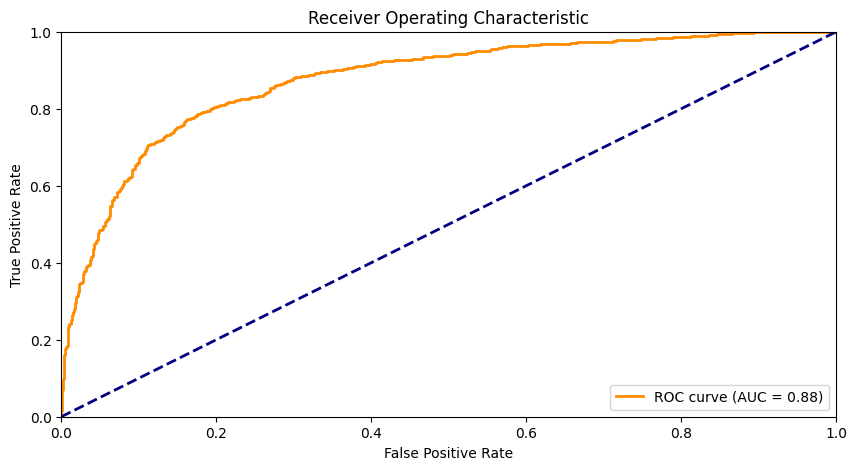

In [48]:
# Train the SVM model
svm = LinearSVC()
svm.fit(X_train, y_train)

# Calibrate the SVM model to obtain probability estimates
svm_calibrated = CalibratedClassifierCV(svm)
svm_calibrated.fit(X_train, y_train)

# Get the predicted probabilities for the positive class
svm_preds_prob = svm_calibrated.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, svm_preds_prob, pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


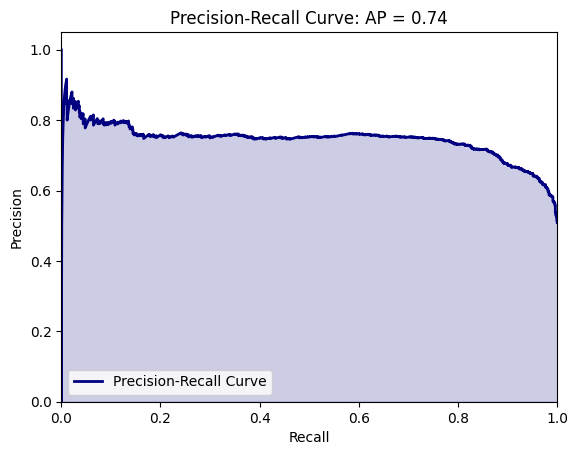

In [49]:
# Fit the SVM model to the training data
svm.fit(X_train, y_train)

# Predict the probabilities for the positive class
svm_probs = svm.decision_function(X_test)

# Calculate the precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, svm_probs)

# Calculate the average precision score
average_precision = average_precision_score(y_test, svm_probs)

# Plot the Precision-Recall curve
plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall Curve')
plt.fill_between(recall, precision, alpha=0.2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP = {0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Define the preprocessing steps for numeric features
rf.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = rf.predict(X_test)

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, rf_preds)*100
print(f"Accuracy of RFC Model: {rf_accuracy:.2f}%")

Accuracy of RFC Model: 84.45%


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have trained and made predictions using the rf RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Calculate precision, recall, F1 score
rf_precision = precision_score(y_test, rf_preds)*100
rf_recall = recall_score(y_test, rf_preds)*100
rf_f1 = f1_score(y_test, rf_preds)*100

# Calculate AUC-ROC
rf_preds_prob = rf.predict_proba(X_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, rf_preds_prob)*100

# Print the evaluation metrics
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 score: {rf_f1:.2f}")
print(f"AUC-ROC: {rf_roc_auc:.2f}")


Precision: 85.17
Recall: 84.09
F1 score: 84.63
AUC-ROC: 91.94


In [53]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

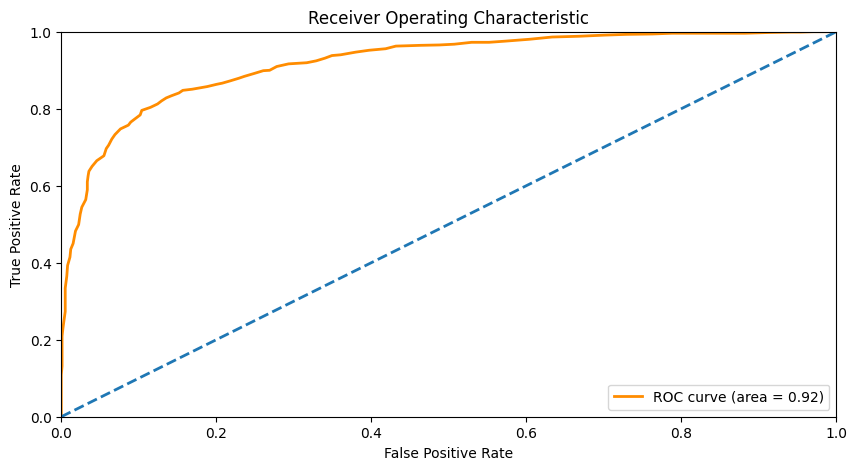

In [54]:
# ROC curve
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

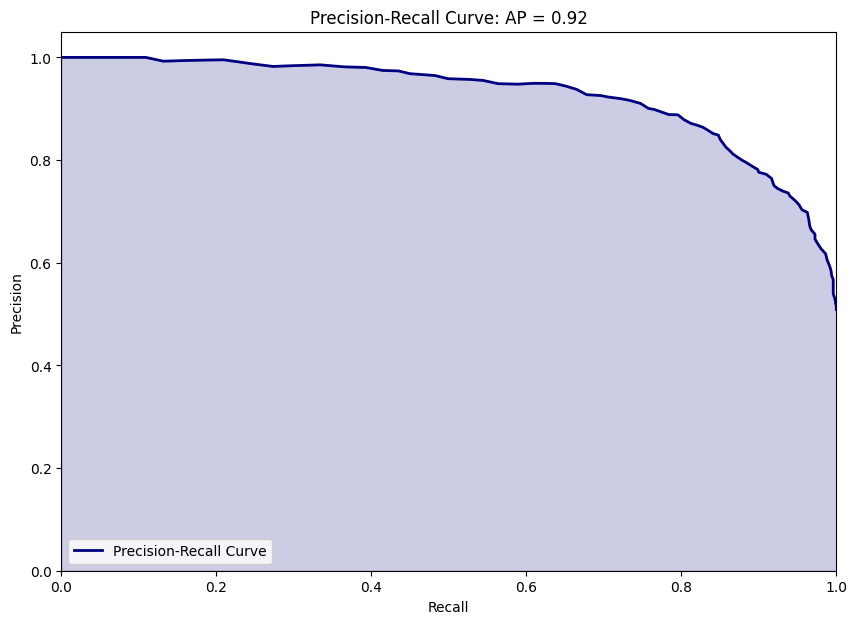

In [55]:
# PR curve
average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall Curve')
plt.fill_between(recall, precision, alpha=0.2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP = {0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()

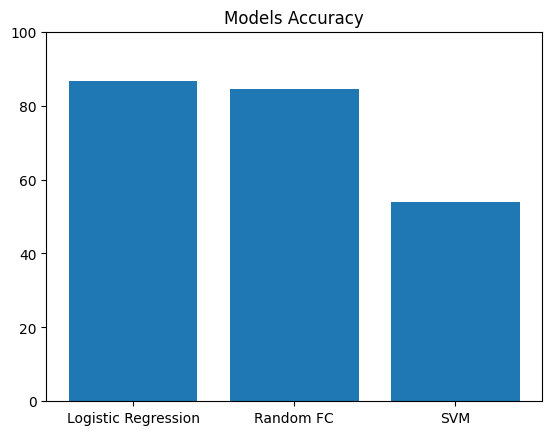

In [56]:
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

models = ['Logistic Regression', 'Random FC', 'SVM']
accuracy = [lr1_accuracy, rf_accuracy, svm_accuracy]

plt.bar(models, accuracy)
plt.title('Models Accuracy')
plt.ylim(0, 100)
plt.show()